In [1]:
import pandas as pd
import requests

In [2]:
res = requests.get('https://api.covid19api.com/country/singapore/status/confirmed?from=2020-03-01T00:00:00Z&to=2023-04-18T00:00:00Z')
res_json = res.json()
res_json[0]

{'Country': 'Singapore',
 'CountryCode': 'SG',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '1.35',
 'Lon': '103.82',
 'Cases': 106,
 'Status': 'confirmed',
 'Date': '2020-03-01T00:00:00Z'}

In [3]:
df = pd.DataFrame(res_json, columns=['Cases', 'Date'])
df.head()

,Cases,Date
0,106,2020-03-01T00:00:00Z
1,108,2020-03-02T00:00:00Z
2,110,2020-03-03T00:00:00Z
3,110,2020-03-04T00:00:00Z
4,117,2020-03-05T00:00:00Z


In [4]:
df.shape

(1104, 2)

In [5]:
# clean date format
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Cases,Date
0,106,2020-03-01 00:00:00+00:00
1,108,2020-03-02 00:00:00+00:00
2,110,2020-03-03 00:00:00+00:00
3,110,2020-03-04 00:00:00+00:00
4,117,2020-03-05 00:00:00+00:00


In [6]:
# rename cases col
df = df.rename(columns={'Cases': 'Cumulative Cases'})

<Axes: xlabel='Date'>

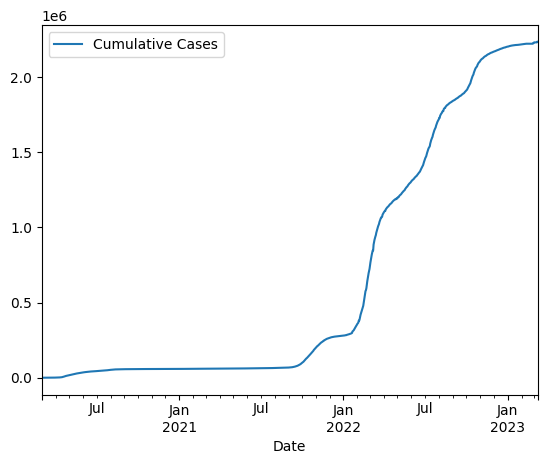

In [7]:
df.plot.line(x='Date', y='Cumulative Cases')